<a href="https://colab.research.google.com/github/bdfd/1.2_House_Model_Exploration/blob/main/House_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# data analysis and wrangling
# import numpy as np
# import pandas as pd
# # require addition install package refer to [1]
# import pandas_profiling 

# import random as rnd
# import warnings

# visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning
# from scipy import stats
# from scipy.stats import norm
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
# data analysis and wrangling
import numpy as np
import pandas as pd

In [22]:
path1 = 'https://github.com/bdfd/1.2_House_Model_Exploration/blob/main/Data/house_model.csv?raw=true'
# upload house price dataset into data frame
df = pd.read_csv(path1)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [23]:
!pip install table-nan-val

In [24]:
from table_nan_val import table_nan_val as tnv

Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


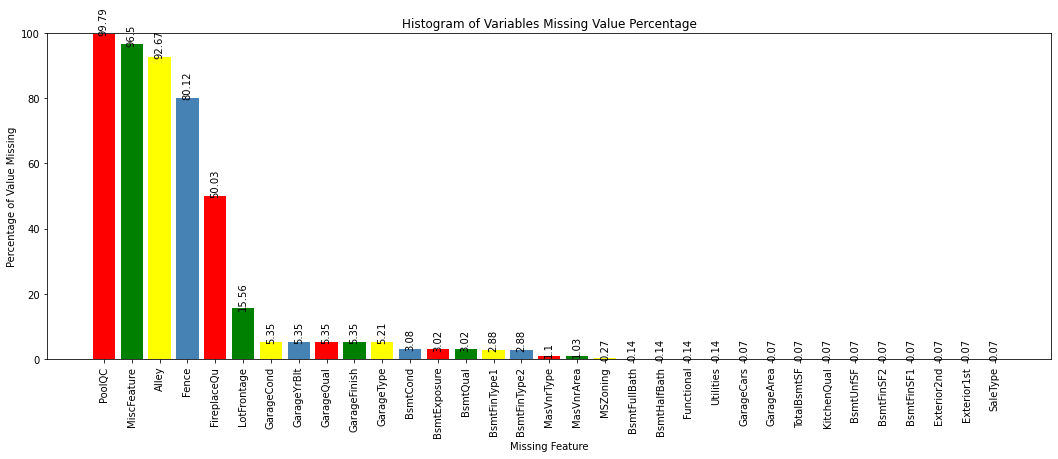

,index,Miss_Values,Miss_Rate,Available_Value
29,PoolQC,1456,99.79,3
31,MiscFeature,1408,96.50,51
2,Alley,1352,92.67,107
30,Fence,1169,80.12,290
21,FireplaceQu,730,50.03,729
1,LotFrontage,227,15.56,1232
28,GarageCond,78,5.35,1381
23,GarageYrBlt,78,5.35,1381
27,GarageQual,78,5.35,1381
24,GarageFinish,78,5.35,1381


In [25]:
tnv.table_nan_val(df)

In [26]:
df = df.dropna(axis='columns',thresh=800)

In [27]:
df.shape

(1459, 75)

In [28]:
missing_value_table(df)

NameError: ignored

In [ ]:
#descriptive statistics summary
df_train['SalePrice'].describe()

In [ ]:
df.describe(include=['number']).shape
df.describe(include=['number'])
print(df.describe(include=['number']).shape,'\n',df.describe(include=['number']).to_string())

In [ ]:
df2= df.describe(include=['number'])
df3 = df2.reset_index()
df3

In [ ]:
df.describe(include=['object']).shape
df.describe(include=['object'])
print(df.describe(include=['object']).shape,'\n',df.describe(include=['object']).to_string())

In [ ]:
df.describe(include='all')

In [ ]:
df['SalePrice']

In [ ]:
missing_value_table(df).transpose()

In [ ]:
df.dtypes

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Histogram-1:sale price distribution
Figure1 = sns.distplot(train_df['SalePrice']);

In [ ]:
#Histogram-2:sale price distribution
Figure2 = sns.histplot(train_df['SalePrice']);

In [ ]:
#skewness and kurtosis analysis from histogram
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

In [ ]:
#ScatterPlot:Ground Living Area vs Saleprice
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#BoxPlot: Overall Quality vs Saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
fig, axs = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#saleprice correlation matrix
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
f, ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height= 2.5)
plt.show();

In [ ]:
#dealing with missing data
train_df2 = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df2 = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
train_df2.isnull().sum().max() #just checking that there's no missing data missing...

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_price['SalePrice'], df_price[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#deleting points
df_price.sort_values(by = 'GrLivArea', ascending = False)[:10]
# df_price = df_price.drop(df_train[df_price['Id'] == 1299].index)
# df_price = df_price.drop(df_train[df_price['Id'] == 524].index)

In [ ]:
#histogram and normal probability plot
sns.distplot(df_price['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_price['SalePrice'], plot=plt)

In [ ]:
#applying log transformation
df_price['SalePrice'] = np.log(df_price['SalePrice'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_price['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_price['SalePrice'], plot=plt)

In [ ]:
#histogram and normal probability plot
sns.distplot(df_price['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_price['GrLivArea'], plot=plt)

In [ ]:
#data transformation
df_price['GrLivArea'] = np.log(df_price['GrLivArea'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_price['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_price['GrLivArea'], plot=plt)

In [ ]:
#histogram and normal probability plot
sns.distplot(df_price['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_price['TotalBsmtSF'], plot=plt)

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_price['HasBsmt'] = pd.Series(len(df_price['TotalBsmtSF']), index=df_price.index)
df_price['HasBsmt'] = 0 
df_price.loc[df_price['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data
df_price.loc[df_price['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_price['TotalBsmtSF'])

In [ ]:
#histogram and normal probability plot
sns.distplot(df_price[df_price['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_price[df_price['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [ ]:
#scatter plot
plt.scatter(df_price['GrLivArea'], df_price['SalePrice']);

In [ ]:
#scatter plot
plt.scatter(df_price[df_price['TotalBsmtSF']>0]['TotalBsmtSF'], df_price[df_price['TotalBsmtSF']>0]['SalePrice']);

In [ ]:
#convert categorical variable into dummy
df_price = pd.get_dummies(df_price)

In [ ]:
df_price